- 1960投资组合理论
- 1965 CAPM资本资产定价模型 Capital Asset Pricing Model
 - $$ R_{i,t} - R_{f,t} = \alpha + \beta_i*(R_{m,t} - R_{f,t}) $$
 - $$ \beta_i = \frac{Cov(R_{i,t} - R_{f,t},R_{m,t} - R_{f,t})}{Var_t{R_{m,t}}} $$
 - 收益率由β唯一决定：没有任何其他的变量能和收益率由关联 α=0
 - 1970 EMH有效市场假说（Fama）
 - 1973 Fama和MacBeth用美股数据验证了CAPM
 - 1981 第一个异象 Anomally
  - 买size小的股票 卖size大的股票 $$ \beta_{small} = \beta_{big} $$
  - $$ R_{S} - R_{B} = \alpha_{SMB} +(\beta_{small} - \beta_{big})*(R_{m,t} - R_{f,t}) $$
  - $ \alpha_{SMB} \neq 0$
  - 买价值股，卖成长股 $\beta_{value} = \beta_{growth}$
   - $$ R_{V} - R_{G} = \alpha_{VMG} + (\beta_{value} - \beta_{growth}) * (R_{m,t} - R_{f,t}) $$
   - $ \alpha_{VMG} \neq 0 $
- 1993Fama和French三因子
  - $$ R_{i,t} - R_{f,t} = \alpha + \beta_i*(R_{m,t} - R_{f,t}) + \beta_{smb} * (R_{S}- R_{B})+ \beta_{vmg} * (R_{V}-R_{G}) $$
- 1996Titman动量策略 追涨杀跌
- 2010前后 α越来越多
- 2013 张橹 投资、盈利买公司投资低卖公司投资高的 买公司ROE return on equity 高的卖ROE低的
  - $$ R_{i,t} - R_{f,t} = \alpha + \beta_i*(R_{m,t} - R_{f,t}) + \beta_{smb} * (R_{S}- R_{B})+ \beta_{roe} * (R_{roe}) $$
- 2015 Fama French 五因子  
  - $$ R_{i,t} - R_{f,t} = \alpha + \beta_i*(R_{m,t} - R_{f,t}) + \beta_{smb} * (R_{S}- R_{B}) + \beta_{vmg} * (R_{V}-R_{G}) +\beta_{inv} * (R_{inv}) + \beta_{roe} * (R_{roe}) $$

In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as stats #统计模块
import scipy
#import pymysql #导入数据库模块

from datetime import datetime #时间模块
import statsmodels.formula.api as smf # OLS regression

import matplotlib.pyplot as plt #画图模块
import matplotlib.dates as mdates #日期格式处理模块
from matplotlib import style #自定义图表风格

from matplotlib.font_manager import FontProperties #作图中文
from pylab import mpl #画图自定义字体
#mpl.rcParams['font.sans-serif']=['SimHei']#指定默认字体
#mpl.rcParams['font.family']='Times New Roman'#指定默认字体

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format='svg' #提高分辨率

from IPython.core.interactiveshell import InteractiveShell #jupyter运行输出的模块
#显示每一个运行的结果
InteractiveShell.ast_node_interactivity='all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns',None)

In [2]:
cross = pd.read_csv("D:/homework/ret_mon_python2023.csv")
from pandas.tseries.offsets import MonthEnd

cross['month'] = pd.to_datetime(cross['month'],format='%Y-%m-%d')+MonthEnd(1)
# 补齐股票代码 如果不满6位 在前面补上0
cross['Stkcd']=cross['Stkcd'].apply(lambda x:'{:0>6}'.format(x))#6位股票代码
cross['w']=1
cross=cross.dropna(subset=['ret'])
cross

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w
1,000001,1991-05-31,38.34,2,24.0,1.016010e+09,1.859497e+09,20.739149,21.343572,-0.122253,0.006092,-0.128345,-0.119551,1
2,000001,1991-06-30,33.99,3,23.0,9.007350e+08,1.648521e+09,20.618722,21.223144,-0.113459,0.006092,-0.119551,-0.137013,1
3,000001,1991-07-31,29.54,4,16.0,7.828100e+08,1.432695e+09,20.478401,21.082823,-0.130921,0.006092,-0.137013,-0.417680,1
4,000001,1991-08-31,15.00,5,15.0,6.748338e+08,1.346275e+09,20.329977,21.020607,-0.411588,0.006092,-0.417680,-0.039425,1
5,000001,1991-09-30,14.50,6,24.0,6.523394e+08,1.301399e+09,20.296075,20.986706,-0.033333,0.006092,-0.039425,0.849080,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752023,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1
752024,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1
752025,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1
752026,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1


# 短期动量 Monmentum
短期反转 reverberation
- 在每个月$t$把所有的股票按照这个月的收益率大小分成10组，最高的收益率叫PMAX，最低的收益率叫P1
- 月末持有P10，卖出P1
- 观察投资组合在$t+1$月的表现

- 真正的动量（GAP当月）：
- 在$t$月，计算股票$t-36$到$t-1$累计收益率 把所有的股票按照这个累计收益率的大小分10组
- 月末持有PMAX，卖出P1
- 观察投资组合在$t+1$月的表现

In [3]:
fenweishu=pd.DataFrame(
    cross.groupby(['month'])['ret'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
)
fenweishu

ret
month                   
1991-01-31 0.1 -0.002031
           0.2  0.002868
           0.3  0.006672
           0.4  0.010476
           0.5  0.022318
...                  ...
2023-12-31 0.5 -0.030481
           0.6 -0.019060
           0.7 -0.003987
           0.8  0.016061
           0.9  0.058594

[3564 rows x 1 columns]

In [4]:
fenweishu=fenweishu.reset_index()
fenweishu

,month,level_1,ret
0,1991-01-31,0.1,-0.002031
1,1991-01-31,0.2,0.002868
2,1991-01-31,0.3,0.006672
3,1991-01-31,0.4,0.010476
4,1991-01-31,0.5,0.022318
...,...,...,...
3559,2023-12-31,0.5,-0.030481
3560,2023-12-31,0.6,-0.019060
3561,2023-12-31,0.7,-0.003987
3562,2023-12-31,0.8,0.016061


In [5]:
# 数据变形 数据长变宽
# 数据变形 数据宽边长

fenweishu=fenweishu.pivot(index='month',columns='level_1',values='ret')
fenweishu

level_1,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
month,,,,,,,,,
1991-01-31,-0.002031,0.002868,0.006672,0.010476,0.022318,0.034159,0.044819,0.055479,0.068586
1991-02-28,-0.042360,-0.037753,-0.012489,0.005470,0.019315,0.030097,0.034615,0.046888,0.081973
1991-03-31,-0.133314,-0.133261,-0.127661,-0.092379,-0.069797,-0.065144,-0.054707,-0.030694,0.028608
1991-04-30,-0.124371,-0.122867,-0.109328,-0.100079,-0.087628,-0.046745,0.020729,0.073833,0.090508
1991-05-31,-0.129118,-0.128345,-0.120582,-0.036993,-0.031989,-0.006657,0.055289,0.080639,0.202117
...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.127963,-0.101104,-0.081604,-0.067501,-0.053251,-0.037892,-0.019222,0.004010,0.046254
2023-09-30,-0.077841,-0.048326,-0.030102,-0.016111,-0.004367,0.005559,0.017018,0.033242,0.066314
2023-10-31,-0.104815,-0.070334,-0.049764,-0.033905,-0.020315,-0.006363,0.010970,0.035557,0.078925


In [6]:
fenweishu.columns = ['one','two','three','four','five','six','seven','eight','nine']
fenweishu

,one,two,three,four,five,six,seven,eight,nine
month,,,,,,,,,
1991-01-31,-0.002031,0.002868,0.006672,0.010476,0.022318,0.034159,0.044819,0.055479,0.068586
1991-02-28,-0.042360,-0.037753,-0.012489,0.005470,0.019315,0.030097,0.034615,0.046888,0.081973
1991-03-31,-0.133314,-0.133261,-0.127661,-0.092379,-0.069797,-0.065144,-0.054707,-0.030694,0.028608
1991-04-30,-0.124371,-0.122867,-0.109328,-0.100079,-0.087628,-0.046745,0.020729,0.073833,0.090508
1991-05-31,-0.129118,-0.128345,-0.120582,-0.036993,-0.031989,-0.006657,0.055289,0.080639,0.202117
...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.127963,-0.101104,-0.081604,-0.067501,-0.053251,-0.037892,-0.019222,0.004010,0.046254
2023-09-30,-0.077841,-0.048326,-0.030102,-0.016111,-0.004367,0.005559,0.017018,0.033242,0.066314
2023-10-31,-0.104815,-0.070334,-0.049764,-0.033905,-0.020315,-0.006363,0.010970,0.035557,0.078925


# 合并回原来的数据表

In [7]:
portfolio=pd.merge(cross,fenweishu,on='month',how='left')
portfolio

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,one,two,three,four,five,six,seven,eight,nine
0,000001,1991-05-31,38.34,2,24.0,1.016010e+09,1.859497e+09,20.739149,21.343572,-0.122253,0.006092,-0.128345,-0.119551,1,-0.129118,-0.128345,-0.120582,-0.036993,-0.031989,-0.006657,0.055289,0.080639,0.202117
1,000001,1991-06-30,33.99,3,23.0,9.007350e+08,1.648521e+09,20.618722,21.223144,-0.113459,0.006092,-0.119551,-0.137013,1,-0.309901,-0.119551,-0.115097,0.166237,0.177858,0.184748,0.190006,0.190283,0.201980
2,000001,1991-07-31,29.54,4,16.0,7.828100e+08,1.432695e+09,20.478401,21.082823,-0.130921,0.006092,-0.137013,-0.417680,1,-0.244184,-0.128701,-0.086966,-0.052277,0.007620,0.067451,0.149691,0.216426,0.246553
3,000001,1991-08-31,15.00,5,15.0,6.748338e+08,1.346275e+09,20.329977,21.020607,-0.411588,0.006092,-0.417680,-0.039425,1,-0.161430,-0.110028,-0.049934,-0.014296,0.018298,0.060859,0.219168,0.233226,0.238218
4,000001,1991-09-30,14.50,6,24.0,6.523394e+08,1.301399e+09,20.296075,20.986706,-0.033333,0.006092,-0.039425,0.849080,1,-0.118675,-0.067377,-0.053691,-0.041891,-0.030783,-0.018184,0.055164,0.175783,0.190067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709878,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,-0.127963,-0.101104,-0.081604,-0.067501,-0.053251,-0.037892,-0.019222,0.004010,0.046254
709879,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,-0.077841,-0.048326,-0.030102,-0.016111,-0.004367,0.005559,0.017018,0.033242,0.066314
709880,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,-0.104815,-0.070334,-0.049764,-0.033905,-0.020315,-0.006363,0.010970,0.035557,0.078925
709881,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1,-0.050131,-0.024692,-0.007101,0.006883,0.020630,0.034527,0.050795,0.075465,0.123638


In [8]:
# where is else (if else)
portfolio['sort'] = np.where(
    portfolio['ret'] <= portfolio['one'], 'P1',
    np.where(
        portfolio['ret'] <= portfolio['two'], 'P2',
        np.where(
            portfolio['ret'] <= portfolio['three'], 'P3',
            np.where(
                portfolio['ret'] <= portfolio['four'], 'P4',
                np.where(
                    portfolio['ret'] <= portfolio['five'], 'P5',
                    np.where(
                        portfolio['ret'] <= portfolio['six'], 'P6',
                        np.where(
                            portfolio['ret'] <= portfolio['seven'], 'P7',
                            np.where(
                                portfolio['ret'] <= portfolio['eight'], 'P8',
                                np.where(
                                    portfolio['ret'] <= portfolio['nine'],
                                    'P9', 'Pmax')))))))))
portfolio

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,one,two,three,four,five,six,seven,eight,nine,sort
0,000001,1991-05-31,38.34,2,24.0,1.016010e+09,1.859497e+09,20.739149,21.343572,-0.122253,0.006092,-0.128345,-0.119551,1,-0.129118,-0.128345,-0.120582,-0.036993,-0.031989,-0.006657,0.055289,0.080639,0.202117,P2
1,000001,1991-06-30,33.99,3,23.0,9.007350e+08,1.648521e+09,20.618722,21.223144,-0.113459,0.006092,-0.119551,-0.137013,1,-0.309901,-0.119551,-0.115097,0.166237,0.177858,0.184748,0.190006,0.190283,0.201980,P2
2,000001,1991-07-31,29.54,4,16.0,7.828100e+08,1.432695e+09,20.478401,21.082823,-0.130921,0.006092,-0.137013,-0.417680,1,-0.244184,-0.128701,-0.086966,-0.052277,0.007620,0.067451,0.149691,0.216426,0.246553,P2
3,000001,1991-08-31,15.00,5,15.0,6.748338e+08,1.346275e+09,20.329977,21.020607,-0.411588,0.006092,-0.417680,-0.039425,1,-0.161430,-0.110028,-0.049934,-0.014296,0.018298,0.060859,0.219168,0.233226,0.238218,P1
4,000001,1991-09-30,14.50,6,24.0,6.523394e+08,1.301399e+09,20.296075,20.986706,-0.033333,0.006092,-0.039425,0.849080,1,-0.118675,-0.067377,-0.053691,-0.041891,-0.030783,-0.018184,0.055164,0.175783,0.190067,P5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709878,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,-0.127963,-0.101104,-0.081604,-0.067501,-0.053251,-0.037892,-0.019222,0.004010,0.046254,P7
709879,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,-0.077841,-0.048326,-0.030102,-0.016111,-0.004367,0.005559,0.017018,0.033242,0.066314,Pmax
709880,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,-0.104815,-0.070334,-0.049764,-0.033905,-0.020315,-0.006363,0.010970,0.035557,0.078925,P4
709881,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1,-0.050131,-0.024692,-0.007101,0.006883,0.020630,0.034527,0.050795,0.075465,0.123638,P2


# 投资策略
选择和收益率线性相关的变量

In [9]:
portfolio=portfolio.dropna(subset=['next_ret','floatingvalue'])
portfolio

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,one,two,three,four,five,six,seven,eight,nine,sort
0,000001,1991-05-31,38.34,2,24.0,1.016010e+09,1.859497e+09,20.739149,21.343572,-0.122253,0.006092,-0.128345,-0.119551,1,-0.129118,-0.128345,-0.120582,-0.036993,-0.031989,-0.006657,0.055289,0.080639,0.202117,P2
1,000001,1991-06-30,33.99,3,23.0,9.007350e+08,1.648521e+09,20.618722,21.223144,-0.113459,0.006092,-0.119551,-0.137013,1,-0.309901,-0.119551,-0.115097,0.166237,0.177858,0.184748,0.190006,0.190283,0.201980,P2
2,000001,1991-07-31,29.54,4,16.0,7.828100e+08,1.432695e+09,20.478401,21.082823,-0.130921,0.006092,-0.137013,-0.417680,1,-0.244184,-0.128701,-0.086966,-0.052277,0.007620,0.067451,0.149691,0.216426,0.246553,P2
3,000001,1991-08-31,15.00,5,15.0,6.748338e+08,1.346275e+09,20.329977,21.020607,-0.411588,0.006092,-0.417680,-0.039425,1,-0.161430,-0.110028,-0.049934,-0.014296,0.018298,0.060859,0.219168,0.233226,0.238218,P1
4,000001,1991-09-30,14.50,6,24.0,6.523394e+08,1.301399e+09,20.296075,20.986706,-0.033333,0.006092,-0.039425,0.849080,1,-0.118675,-0.067377,-0.053691,-0.041891,-0.030783,-0.018184,0.055164,0.175783,0.190067,P5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709877,605599,2023-07-31,13.92,23,21.0,8.166555e+09,1.082667e+10,22.823313,23.105278,0.053747,0.001241,0.052506,-0.027103,1,-0.109131,-0.061730,-0.031833,-0.004677,0.018420,0.038359,0.058412,0.084426,0.130416,P7
709878,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,-0.127963,-0.101104,-0.081604,-0.067501,-0.053251,-0.037892,-0.019222,0.004010,0.046254,P7
709879,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,-0.077841,-0.048326,-0.030102,-0.016111,-0.004367,0.005559,0.017018,0.033242,0.066314,Pmax
709880,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,-0.104815,-0.070334,-0.049764,-0.033905,-0.020315,-0.006363,0.010970,0.035557,0.078925,P4


In [10]:
# 短期动量策略
portfolio_mom =  pd.DataFrame(
    portfolio.groupby(['month','sort']).apply(lambda x: np.average(x['next_ret'],weights = x['floatingvalue']),include_groups=False))
portfolio_mom                            

0
month      sort          
1991-01-31 P1   -0.041567
           P2    0.010496
           P4    0.038284
           P6    0.081305
           P8    0.028134
...                   ...
2023-11-30 P6   -0.012190
           P7   -0.023572
           P8   -0.026295
           P9    0.005428
           Pmax -0.050056

[3946 rows x 1 columns]

In [11]:
portfolio_mom=portfolio_mom.reset_index()
portfolio_mom.columns=['month','sort','p']
portfolio_mom['month']=portfolio_mom['month']+MonthEnd(1)
portfolio_mom.dropna(subset=['p'],inplace=True)
portfolio_mom

,month,sort,p
0,1991-02-28,P1,-0.041567
1,1991-02-28,P2,0.010496
2,1991-02-28,P4,0.038284
3,1991-02-28,P6,0.081305
4,1991-02-28,P8,0.028134
...,...,...,...
3941,2023-12-31,P6,-0.012190
3942,2023-12-31,P7,-0.023572
3943,2023-12-31,P8,-0.026295
3944,2023-12-31,P9,0.005428


In [12]:
portfolio_mom=portfolio_mom.pivot(index='month',columns='sort',values='p')
portfolio_mom
        

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax
month,,,,,,,,,,
1991-02-28,-0.041567,0.010496,NaN,0.038284,NaN,0.081305,NaN,0.028134,NaN,-0.002070
1991-03-31,-0.133253,-0.069140,-0.133293,0.023904,-0.125264,0.070941,-0.133504,-0.044343,-0.070455,-0.059149
1991-04-30,-0.122736,-0.123391,-0.103582,-0.077512,-0.133193,-0.000595,0.070484,-0.097744,0.120035,0.087227
1991-05-31,-0.006657,-0.129118,-0.036993,-0.120582,-0.130814,-0.031989,0.080639,0.055289,0.202117,0.238572
1991-06-30,-0.093032,-0.119551,-0.460637,-0.309901,0.190006,0.177858,0.213185,0.190283,0.166237,0.201980
...,...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.048515,-0.047374,-0.049198,-0.064861,-0.052590,-0.056458,-0.054358,-0.052533,-0.059833,-0.069041
2023-09-30,-0.013215,-0.008910,-0.008950,0.000798,0.000158,0.002106,0.001202,-0.024952,-0.007080,-0.012874
2023-10-31,-0.068257,-0.026400,-0.026712,-0.035206,-0.022298,-0.013751,-0.022298,-0.033380,-0.029932,0.008262


# 我的策略

In [13]:
portfolio_mom['MYportfolio']=portfolio_mom['P1']-portfolio_mom['Pmax']
portfolio_mom

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,MYportfolio
month,,,,,,,,,,,
1991-02-28,-0.041567,0.010496,NaN,0.038284,NaN,0.081305,NaN,0.028134,NaN,-0.002070,-0.039497
1991-03-31,-0.133253,-0.069140,-0.133293,0.023904,-0.125264,0.070941,-0.133504,-0.044343,-0.070455,-0.059149,-0.074104
1991-04-30,-0.122736,-0.123391,-0.103582,-0.077512,-0.133193,-0.000595,0.070484,-0.097744,0.120035,0.087227,-0.209963
1991-05-31,-0.006657,-0.129118,-0.036993,-0.120582,-0.130814,-0.031989,0.080639,0.055289,0.202117,0.238572,-0.245229
1991-06-30,-0.093032,-0.119551,-0.460637,-0.309901,0.190006,0.177858,0.213185,0.190283,0.166237,0.201980,-0.295012
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.048515,-0.047374,-0.049198,-0.064861,-0.052590,-0.056458,-0.054358,-0.052533,-0.059833,-0.069041,0.020526
2023-09-30,-0.013215,-0.008910,-0.008950,0.000798,0.000158,0.002106,0.001202,-0.024952,-0.007080,-0.012874,-0.000340
2023-10-31,-0.068257,-0.026400,-0.026712,-0.035206,-0.022298,-0.013751,-0.022298,-0.033380,-0.029932,0.008262,-0.076519


In [14]:
portfolio_mom=portfolio_mom['2000':]
portfolio_mom

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,MYportfolio
month,,,,,,,,,,,
2000-01-31,0.128892,0.125095,0.109649,0.164682,0.134155,0.117154,0.154231,0.133388,0.189671,0.277708,-0.148816
2000-02-29,0.148460,0.098851,0.122838,0.084378,0.193957,0.095636,0.080466,0.102473,0.169644,0.125983,0.022476
2000-03-31,0.028538,0.056167,0.088460,0.093958,0.115092,0.082248,0.079722,0.081513,0.040770,-0.044828,0.073366
2000-04-30,-0.005793,0.018555,0.037055,0.023933,0.009921,0.018328,0.021396,0.004873,-0.011356,-0.015714,0.009921
2000-05-31,0.019856,0.013618,0.007191,0.016574,0.034658,0.026428,0.025010,0.058083,0.021637,0.036778,-0.016922
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.048515,-0.047374,-0.049198,-0.064861,-0.052590,-0.056458,-0.054358,-0.052533,-0.059833,-0.069041,0.020526
2023-09-30,-0.013215,-0.008910,-0.008950,0.000798,0.000158,0.002106,0.001202,-0.024952,-0.007080,-0.012874,-0.000340
2023-10-31,-0.068257,-0.026400,-0.026712,-0.035206,-0.022298,-0.013751,-0.022298,-0.033380,-0.029932,0.008262,-0.076519


In [15]:
model_mom=smf.ols('MYportfolio~1',data=portfolio_mom).fit(
    cov_type='HAC',cov_kwds={'maxlags':6})
print(model_mom.summary())
# 回归的结果和直接做均值t检验的结果是一样的

                            OLS Regression Results                            
Dep. Variable:            MYportfolio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 03 Dec 2024   Prob (F-statistic):                nan
Time:                        21:36:23   Log-Likelihood:                 368.00
No. Observations:                 288   AIC:                            -734.0
Df Residuals:                     287   BIC:                            -730.3
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0089      0.004      2.375      0.0

In [16]:
data = pd.read_csv("D:/homework/000001.csv")
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)
data_new=data['2000-01':'2024-09'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose']=pd.to_numeric(data_new['Preclose'])
#计算000001上证指数日收益率 两种：
data_new['Raw_return']=data_new['Close']/data_new['Preclose']-1
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Month_data.reset_index(inplace = True)
Month_data.rename(columns = {'Day':'month'}, inplace = True)
Month_data.set_index('month', inplace = True)
Month_data

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.050,99.980,95.790,99.980,126000.00,4.940000e+05
1990-12-20,99.98,104.300,104.390,99.980,104.390,19700.00,8.400000e+04
1990-12-21,104.39,109.070,109.130,103.730,109.130,2800.00,1.600000e+04
1990-12-24,109.13,113.570,114.550,109.130,114.550,3200.00,3.100000e+04
1990-12-25,114.55,120.090,120.250,114.550,120.250,1500.00,6.000000e+03
...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07


,Raw_return
month,
2000-01-31,0.123242
2000-02-29,0.116990
2000-03-31,0.049948
2000-04-30,0.020053
2000-05-31,0.031710
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


# 什么是β和α

In [17]:
MYPORT=pd.merge(portfolio_mom,Month_data,how='left',on='month')
MYPORT

,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,MYportfolio,Raw_return
month,,,,,,,,,,,,
2000-01-31,0.128892,0.125095,0.109649,0.164682,0.134155,0.117154,0.154231,0.133388,0.189671,0.277708,-0.148816,0.123242
2000-02-29,0.148460,0.098851,0.122838,0.084378,0.193957,0.095636,0.080466,0.102473,0.169644,0.125983,0.022476,0.116990
2000-03-31,0.028538,0.056167,0.088460,0.093958,0.115092,0.082248,0.079722,0.081513,0.040770,-0.044828,0.073366,0.049948
2000-04-30,-0.005793,0.018555,0.037055,0.023933,0.009921,0.018328,0.021396,0.004873,-0.011356,-0.015714,0.009921,0.020053
2000-05-31,0.019856,0.013618,0.007191,0.016574,0.034658,0.026428,0.025010,0.058083,0.021637,0.036778,-0.016922,0.031710
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.048515,-0.047374,-0.049198,-0.064861,-0.052590,-0.056458,-0.054358,-0.052533,-0.059833,-0.069041,0.020526,-0.052009
2023-09-30,-0.013215,-0.008910,-0.008950,0.000798,0.000158,0.002106,0.001202,-0.024952,-0.007080,-0.012874,-0.000340,-0.003013
2023-10-31,-0.068257,-0.026400,-0.026712,-0.035206,-0.022298,-0.013751,-0.022298,-0.033380,-0.029932,0.008262,-0.076519,-0.029483


In [18]:
model_mom=smf.ols('MYportfolio~Raw_return',data=MYPORT).fit(
    cov_type='HAC',cov_kwds={'maxlags':6})
print(model_mom.summary())

                            OLS Regression Results                            
Dep. Variable:            MYportfolio   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.134
Date:                Tue, 03 Dec 2024   Prob (F-statistic):              0.288
Time:                        21:36:23   Log-Likelihood:                 369.66
No. Observations:                 288   AIC:                            -735.3
Df Residuals:                     286   BIC:                            -728.0
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0094      0.003      2.712      0.0

$$
R_{mom,t}=0.0094-0.1021*R_{m,t}
$$

- $\beta$是负的，而且不显著，说明我的策略和大盘无关，我的策略不是$\beta$策略
- $\alpha$是正的，而且在1%置信水平显著，说明我的策略是纯粹的$\alpha$策略

In [19]:
# 还原投资组合的价格
MYPORT['MYportfolio_price']=(MYPORT['MYportfolio']+1).cumprod()
MYPORT['Pmax_price']=(MYPORT['Pmax']+1).cumprod()
MYPORT['P1_price']=(MYPORT['P1']+1).cumprod()
MYPORT['Market_price']=(MYPORT['Raw_return']+1).cumprod()
MYPORT['price_market'] = (1 + MYPORT['Raw_return']).cumprod()
MYPORT

,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,MYportfolio,Raw_return,MYportfolio_price,Pmax_price,P1_price,Market_price,price_market
month,,,,,,,,,,,,,,,,,
2000-01-31,0.128892,0.125095,0.109649,0.164682,0.134155,0.117154,0.154231,0.133388,0.189671,0.277708,-0.148816,0.123242,0.851184,1.277708,1.128892,1.123242,1.123242
2000-02-29,0.148460,0.098851,0.122838,0.084378,0.193957,0.095636,0.080466,0.102473,0.169644,0.125983,0.022476,0.116990,0.870316,1.438677,1.296487,1.254650,1.254650
2000-03-31,0.028538,0.056167,0.088460,0.093958,0.115092,0.082248,0.079722,0.081513,0.040770,-0.044828,0.073366,0.049948,0.934168,1.374184,1.333486,1.317318,1.317318
2000-04-30,-0.005793,0.018555,0.037055,0.023933,0.009921,0.018328,0.021396,0.004873,-0.011356,-0.015714,0.009921,0.020053,0.943436,1.352590,1.325762,1.343734,1.343734
2000-05-31,0.019856,0.013618,0.007191,0.016574,0.034658,0.026428,0.025010,0.058083,0.021637,0.036778,-0.016922,0.031710,0.927471,1.402335,1.352086,1.386344,1.386344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.048515,-0.047374,-0.049198,-0.064861,-0.052590,-0.056458,-0.054358,-0.052533,-0.059833,-0.069041,0.020526,-0.052009,6.946370,0.316197,4.670596,2.282984,2.282984
2023-09-30,-0.013215,-0.008910,-0.008950,0.000798,0.000158,0.002106,0.001202,-0.024952,-0.007080,-0.012874,-0.000340,-0.003013,6.944005,0.312126,4.608875,2.276105,2.276105
2023-10-31,-0.068257,-0.026400,-0.026712,-0.035206,-0.022298,-0.013751,-0.022298,-0.033380,-0.029932,0.008262,-0.076519,-0.029483,6.412660,0.314704,4.294287,2.208999,2.208999


# 价格图片   

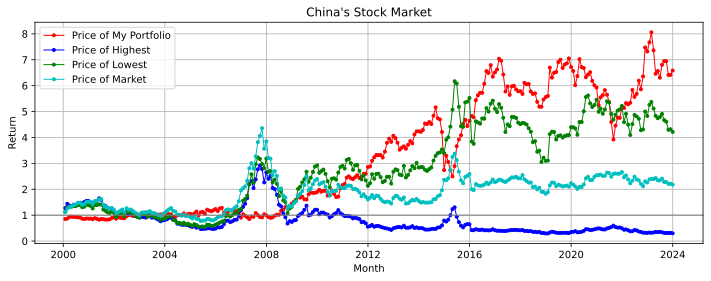

In [20]:
# 画图
fig = plt.figure(figsize=(12, 4))
plt.plot(
    'MYportfolio_price',  
    '.-r', 
    label='Price of My Portfolio',  
    linewidth=1, 
    data=MYPORT)  
plt.title("China's Stock Market") 
plt.xlabel('Month') 
plt.ylabel('Return') 

plt.plot(
    'Pmax_price', 
    '.-b', 
    label='Price of Highest', 
    linewidth=1, 
    data=MYPORT) 

plt.plot(
    'P1_price', 
    '.-g', 
    label='Price of Lowest', 
    linewidth=1, 
    data=MYPORT) 

plt.plot(
    'Market_price', 
    '.-c', 
    label='Price of Market', 
    linewidth=1, 
    data=MYPORT) 

# plot legend
plt.legend(loc='upper left')

# 添加网格线
plt.grid(True)

# 添加横线 1
plt.axhline(y=1, color='gray', linewidth=1)

plt.show();

In [21]:
MYPORT['cumlative_return']=(1+MYPORT['MYportfolio']).cumprod()

MYPORT['roll_max']=MYPORT['cumlative_return'].cummax()

MYPORT['drawdown']=MYPORT['cumlative_return']/MYPORT['roll_max']-1

max_drawdown=MYPORT['drawdown'].min()
print('最大回撤为：',max_drawdown)

最大回撤为： -0.5167687396538915


In [22]:
max_drawdown_time=MYPORT['drawdown'].idxmin()
max_drawdown_start=MYPORT.loc[:max_drawdown_time,'cumlative_return'].idxmax()

print('最大回撤开始时间为：',max_drawdown_start)
print('最大回撤结束时间为：',max_drawdown_time)

最大回撤开始时间为： 2014-08-31 00:00:00
最大回撤结束时间为： 2015-04-30 00:00:00
